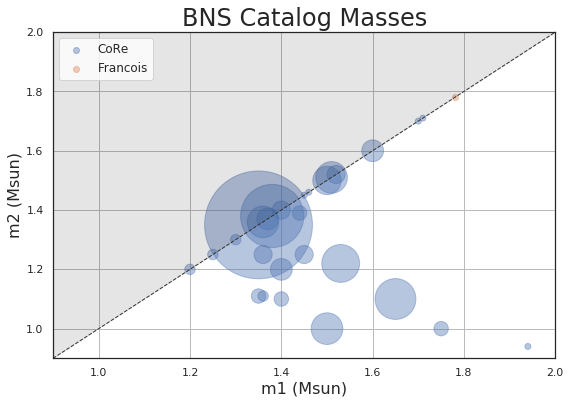

In [39]:
import h5py
import os
import matplotlib as mpl
import numpy as np
import seaborn as sb
from matplotlib.backends.backend_pdf import PdfPages

filepath = '/home/dwhite/GWPAC/h5_conversions/converted_files/'
master_list = []
sims_list = []
names = []

for (dirpath, dirnames, filenames) in os.walk(filepath):
    for file in filenames:
        if '.h5' in file:
            exists = 'no'
            duplicate = 'no'
            
            pieces = (file.split('/'))[-1].split('_')
            name = pieces[0]
            ID = pieces[1]
            
            fd = h5py.File(os.path.join(dirpath, file), 'r')
            mass1 = round(max(fd.attrs['mass1-msol'],fd.attrs['mass2-msol']),2)
            mass2 = round(min(fd.attrs['mass1-msol'],fd.attrs['mass2-msol']),2)

            for group in master_list:
                if name in group[0][0]:
                    exists = 'yes'
                    for system in group:
                        if str(str(name) + '_' + str(ID)) in sims_list:
                            duplicate = 'yes'
                            break
                    if duplicate == 'no':
                        for system in group:
                            sims_list.append(str(name) + '_' + str(ID))
                            if (mass1 == system[1]) and (mass2 == system[2]):
                                system[3] += 1
                                duplicate = 'yes'
                                break
                    if duplicate == 'no':
                        group.append([name, mass1, mass2, 1])
            if exists == 'no':
                master_list.append([[name, mass1, mass2, 1]])
                sims_list.append(str(name) + '_' + str(ID))
                names.append(name)
                
for i in np.arange(len(master_list)):
    master_list[i] = np.asarray(master_list[i], dtype = object).transpose().tolist()
            
with PdfPages('plot.pdf') as pdf:
    sb.set(style='white')
    x = np.linspace(0.9, 2.0, 1000)
    fig = mpl.pyplot.figure(figsize=(9,6))
    mpl.pyplot.xlim(0.9,2.0)
    mpl.pyplot.ylim(0.9,2.0)
    mpl.pyplot.xlabel('m1 (Msun)', fontsize=16)
    mpl.pyplot.ylabel('m2 (Msun)', fontsize=16)
    mpl.pyplot.title('BNS Catalog Masses', fontsize=24)
    mpl.pyplot.grid(color='#BBBBBB', linewidth=1)
    for group in master_list:
        for i in np.arange(len(group[3])):
            group[3][i] = ((group[3][i])**1.6)*36
        scatter1 = mpl.pyplot.scatter(group[1], group[2], s=group[3], 
                   alpha=0.4, label=group[0])
    lgnd = mpl.pyplot.legend(names, scatterpoints=1, loc=2, fontsize=12)
    for i in np.arange(len(lgnd.legendHandles)):
        lgnd.legendHandles[i]._sizes = [36]
    mpl.pyplot.plot(x,x, color='#333333', linestyle='--', linewidth=1)
    mpl.pyplot.fill_between(x, x, 2, facecolor='black', alpha=.1)
    pdf.savefig(fig)
    mpl.pyplot.show()